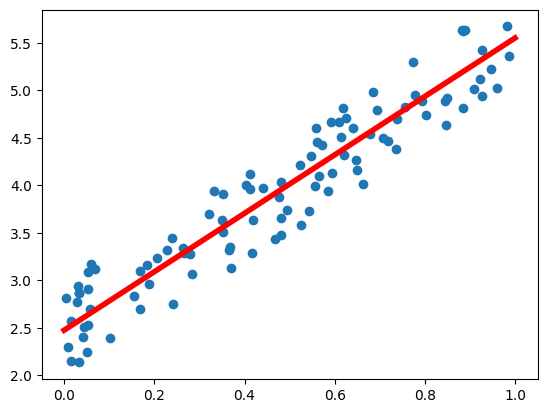

[0.08682281 0.11018569 0.06037464 0.08692647 0.090881  ]


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

def validacion_cruzada():
    # 1. Crear conjunto de datos (y = ϴ0 * x0 + ϴ1 * x1)
    m = 100 # no. de instancias
    X = np.random.rand(m, 1) # atributos
    y = 2 + 3 * X + np.random.rand(m, 1) # etiquetas (ecuación original: 2 + 3 * x1)

    # 2. Dividir en conjunto de datos de entrenamiento (train) y prueba (test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    # 3. Entrenamos el modelo con scikit-learn
    lin_reg = LinearRegression() # declaramos instancia de LinearRegression()
    lin_reg.fit(X_train, y_train) # entrenamos el modelo con el método .fit()

    # 4. Gráficamos el modelo (habilitado - no olvides colocar plt.show)
    X_plot = np.linspace(0, 1, m).reshape(m, 1) # generamos arreglo de 100 elementos con rango de 0 a 1
    y_plot = lin_reg.predict(X_plot) # utilizamos el método .predict() del modelo entrenado para predecir el valor de y
    plt.scatter(X, y)
    plt.plot(X_plot, y_plot, linewidth=4, color='r') # línea estimada
    plt.show() # desactiva la gráfica comentando esta línea

    # 5. Evaluamos modelo con cross-validation (X_train, y_train)
    scores = cross_val_score(lin_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=5)

    # Extra: evaluar con error cuadrático medio (ECM)
    #print(mean_squared_error(y_test, lin_reg.predict(X_test)))
    
    # no modificar nada debajo de esta línea
    return -scores # retornar puntajes de validación cruzada

print(validacion_cruzada())